<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1cI62fPIKkkofrAHLQaWLfcIr3qlE1TAZ" width = "350" align="center"/>



Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad.
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo (Por lo menos debe comparar cuatro modelos)
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: El alumno tiene la libertad de desarrollar un análisis más completo del problema. Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [89]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [99]:
housing.dropna()
print(housing.shape)
#no hay filas con datos faltantes

(20640, 9)


['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude', 'target']


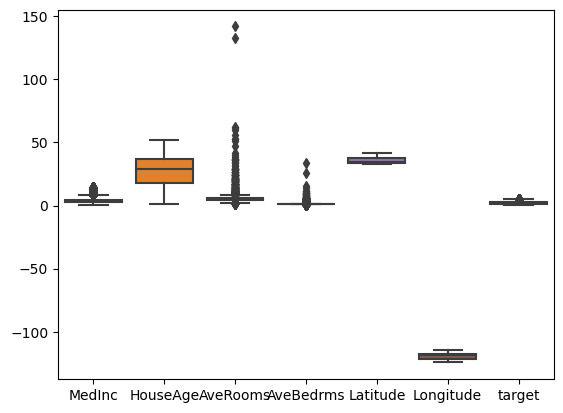

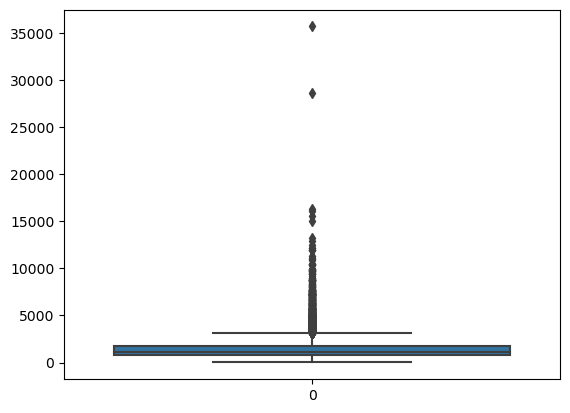

<AxesSubplot:>

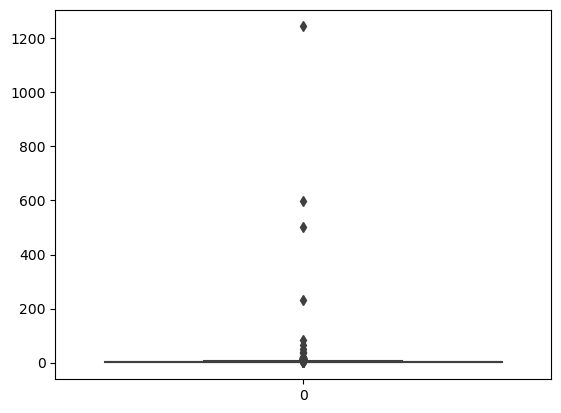

In [30]:
columnas = housing.columns.tolist()
columnas.remove("Population")
columnas.remove("AveOccup")
print(columnas)
sns.boxplot(data=housing[columnas])
plt.show()
sns.boxplot(data=housing["Population"])
plt.show()
sns.boxplot(data=housing["AveOccup"])
#muchos outliers asi que es mejor ocupar un normalizador para este caso sobre las columnas que se utilizaran

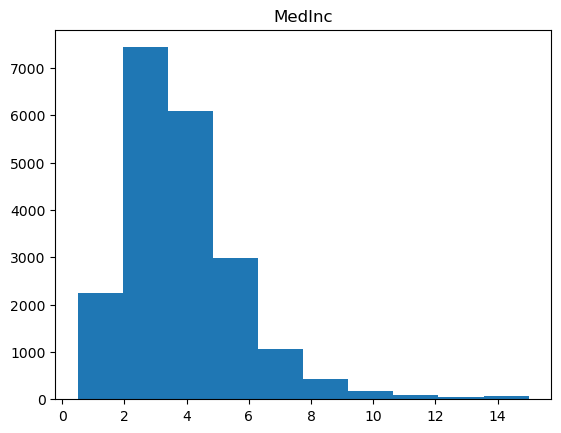

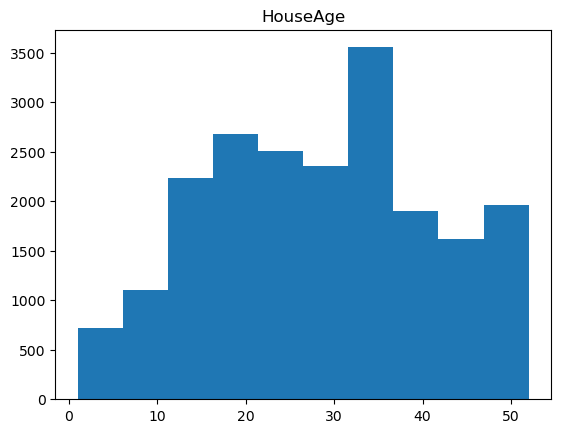

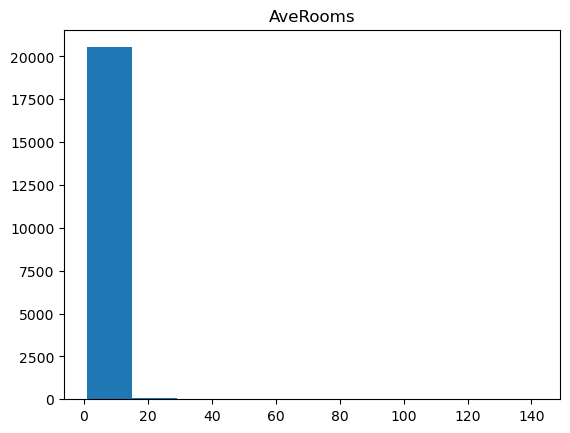

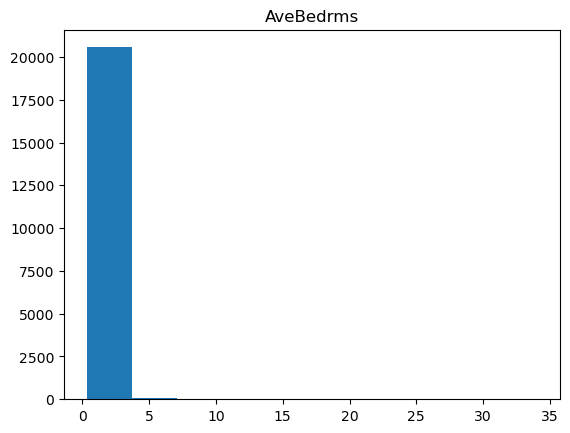

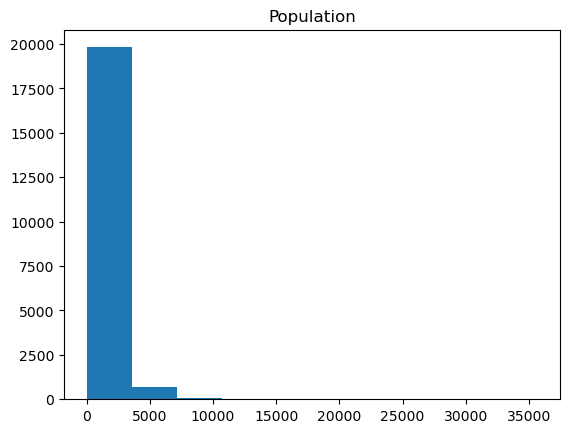

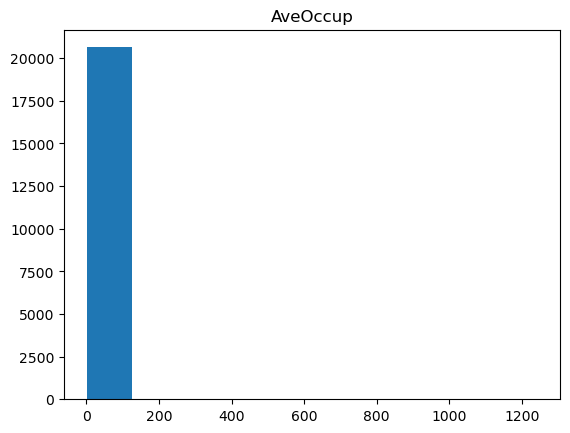

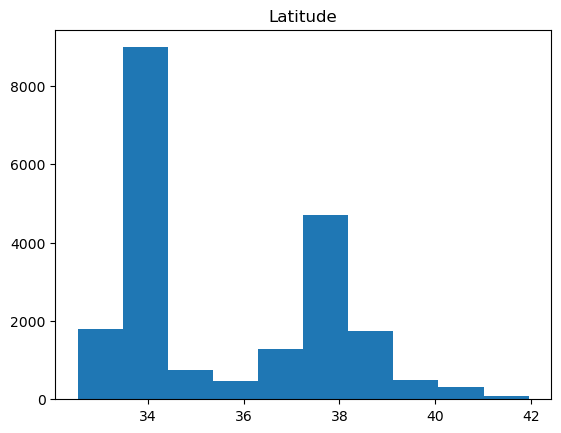

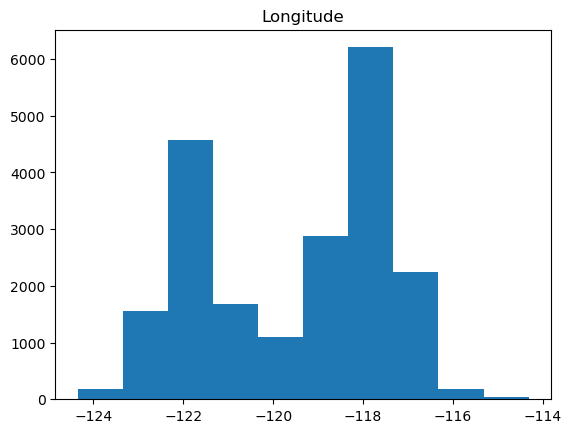

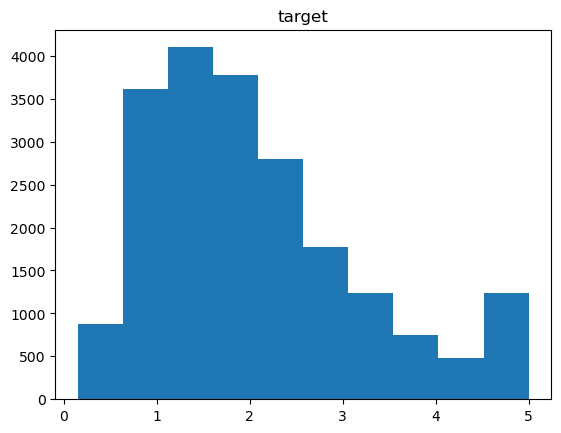

In [41]:
for i in housing.columns.tolist():
    plt.hist(x=housing[i], )
    plt.title(i)
    plt.show()

In [95]:
from sklearn.preprocessing import RobustScaler
columnas2 = ["MedInc", "HouseAge", "Latitude", "Longitude"] #columnas utilizadas para el entrenamiento y testeo
contador = 0
aux = []
for i in columnas:
    if i in columnas2:
        aux.append(contador)
    contador += 1

X = housing.iloc[:, aux]
X = RobustScaler().fit(X).transform(X)
target = housing["target"].tolist()

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,target,test_size=0.2,shuffle=False)

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso

model1 = LinearRegression().fit(X_train, Y_train)
y_pred1 = model1.predict(X_test)
model2 = Ridge().fit(X_train,Y_train)
y_pred2 = model2.predict(X_test)
model3 = KNeighborsRegressor().fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)
model4 = Lasso().fit(X_train,Y_train)
y_pred4 = model4.predict(X_test)
list_pred = [y_pred1, y_pred2, y_pred3, y_pred4]

In [98]:
contador = 1
for i in list_pred:
    df = pd.DataFrame()
    df["y"] = Y_test
    df["yhat"] = i
    print("y_pred"+str(contador)+": \n",regression_metrics(df))
    contador += 1
#segun las metricas el modelo que mejor predice los precios es 

y_pred1: 
       mae     mse    rmse     mape   smape
0  0.6178  0.6999  0.8366  35.3044  0.5219
y_pred2: 
       mae     mse    rmse     mape   smape
0  0.6178  0.6999  0.8366  35.3058  0.5219
y_pred3: 
       mae     mse    rmse     mape  smape
0  0.5881  0.6138  0.7835  33.1589  0.498
y_pred4: 
       mae     mse    rmse     mape   smape
0  0.9746  1.5145  1.2306  60.2413  0.7519
